# Facial Expression Recognition

#### Loading the datasets

In [11]:
import os
os.chdir('./src')

from trainer import Trainer
from cnn_model import CNNModel
from fer_reader import FERReader
os.chdir('..')

import tensorflow as tf
from IPython.display import display
import numpy as np

np.random.seed(42)

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config = config)

reader = FERReader("datasets/fer2013.csv", "datasets/fer2013new.csv")
X_train, X_validation, X_test = reader.read()

#### Utility functions

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
    
def generate_confusion_matrix(y_true, y_pred, labels):
    return confusion_matrix(y_true, y_pred, labels=labels)

def plot_confusion_matrix(y_true, y_pred, target_names, title='Confusion matrix', cmap=None, normalize=True):
    import itertools
    
    y_true = [target_names[np.argmax(y_true[i])] for i in range(len(y_true))]
    y_pred = [target_names[np.argmax(y_pred[i])] for i in range(len(y_true))]
    
    cm = confusion_matrix(y_true, y_pred, labels=target_names)
    score = f1_score(y_true, y_pred, average="macro")
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]    

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\nf1_score={:0.4f}; accuracy={:0.4f}; misclass={:0.4f}'.format(score, accuracy, misclass))
    plt.show()
    
def plot_history(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()    

#### Naive predictions

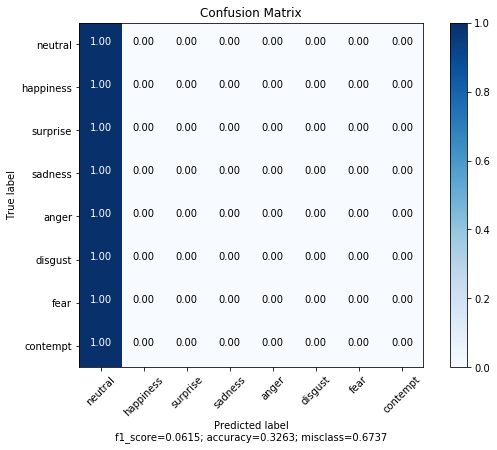

In [13]:
from keras.utils import to_categorical

def naive_predict_array(images):
    return np.tile(to_categorical(reader.emotion_columns.index("neutral"), reader.emotion_count), (len(images), 1)) 

y_test = reader.generate_emotions(reader.test_set)
y_pred = naive_predict_array(X_test) 
plot_confusion_matrix(y_test, y_pred, reader.emotion_columns, normalize=True, title="Confusion Matrix")

#### Building the model

In [14]:
import keras

model = CNNModel((48, 48, 1), reader.emotion_count).build_model()
model.compile(loss=keras.losses.categorical_crossentropy, optimizer="adam", metrics=['acc'])

#### Training the model

In [15]:
trainer = Trainer("model/cnnmodel-{epoch:03d}-{val_loss:.4f}-{val_acc:.4f}.hdf5", verbose=1, batch_size=512)
history = trainer.train(model, reader, X_train, X_validation)

Epoch 1/5000
56/55 [==============================] - 35s 628ms/step - loss: 1.8301 - acc: 0.3656 - val_loss: 1.6201 - val_acc: 0.4306

Epoch 00001: val_loss improved from inf to 1.62009, saving model to model/cnnmodel-001-1.6201-0.4306.hdf5
Epoch 2/5000
56/55 [==============================] - 29s 516ms/step - loss: 1.5159 - acc: 0.4639 - val_loss: 2.0058 - val_acc: 0.3403

Epoch 00002: val_loss did not improve from 1.62009
Epoch 3/5000
56/55 [==============================] - 32s 568ms/step - loss: 1.3943 - acc: 0.5082 - val_loss: 2.1490 - val_acc: 0.3174

Epoch 00003: val_loss did not improve from 1.62009
Epoch 4/5000
56/55 [==============================] - 32s 567ms/step - loss: 1.3065 - acc: 0.5428 - val_loss: 1.5864 - val_acc: 0.4543

Epoch 00004: val_loss improved from 1.62009 to 1.58638, saving model to model/cnnmodel-004-1.5864-0.4543.hdf5
Epoch 5/5000
56/55 [==============================] - 32s 564ms/step - loss: 1.2481 - acc: 0.5627 - val_loss: 1.3318 - val_acc: 0.5342

Ep

56/55 [==============================] - 32s 567ms/step - loss: 0.9131 - acc: 0.6835 - val_loss: 0.9385 - val_acc: 0.6837

Epoch 00040: val_loss did not improve from 0.91334
Epoch 41/5000
56/55 [==============================] - 32s 567ms/step - loss: 0.9287 - acc: 0.6795 - val_loss: 0.9570 - val_acc: 0.6709

Epoch 00041: val_loss did not improve from 0.91334
Epoch 42/5000
56/55 [==============================] - 32s 565ms/step - loss: 0.9212 - acc: 0.6802 - val_loss: 0.9214 - val_acc: 0.6820

Epoch 00042: val_loss did not improve from 0.91334
Epoch 43/5000
56/55 [==============================] - 32s 564ms/step - loss: 0.9248 - acc: 0.6828 - val_loss: 0.9329 - val_acc: 0.6918

Epoch 00043: val_loss did not improve from 0.91334
Epoch 44/5000
56/55 [==============================] - 32s 570ms/step - loss: 0.9079 - acc: 0.6886 - val_loss: 0.9148 - val_acc: 0.6960

Epoch 00044: val_loss did not improve from 0.91334
Epoch 45/5000
56/55 [==============================] - 32s 572ms/step - lo

56/55 [==============================] - 32s 575ms/step - loss: 0.8627 - acc: 0.7065 - val_loss: 0.8822 - val_acc: 0.7030

Epoch 00082: val_loss did not improve from 0.86220
Epoch 83/5000
56/55 [==============================] - 32s 572ms/step - loss: 0.8752 - acc: 0.7020 - val_loss: 0.9219 - val_acc: 0.6924

Epoch 00083: val_loss did not improve from 0.86220
Epoch 84/5000
56/55 [==============================] - 32s 574ms/step - loss: 0.8667 - acc: 0.7024 - val_loss: 0.9212 - val_acc: 0.6840

Epoch 00084: val_loss did not improve from 0.86220
Epoch 85/5000
56/55 [==============================] - 32s 566ms/step - loss: 0.8714 - acc: 0.7004 - val_loss: 0.8633 - val_acc: 0.7069

Epoch 00085: val_loss did not improve from 0.86220

Epoch 00085: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 86/5000
56/55 [==============================] - 32s 565ms/step - loss: 0.8545 - acc: 0.7056 - val_loss: 0.8611 - val_acc: 0.7075

Epoch 00086: val_loss improved from 0.86220

56/55 [==============================] - 32s 566ms/step - loss: 0.8195 - acc: 0.7192 - val_loss: 0.8377 - val_acc: 0.7111

Epoch 00122: val_loss did not improve from 0.78268
Epoch 123/5000
56/55 [==============================] - 32s 564ms/step - loss: 0.8204 - acc: 0.7205 - val_loss: 0.8465 - val_acc: 0.7136

Epoch 00123: val_loss did not improve from 0.78268
Epoch 124/5000
56/55 [==============================] - 32s 564ms/step - loss: 0.8161 - acc: 0.7205 - val_loss: 0.8313 - val_acc: 0.7122

Epoch 00124: val_loss did not improve from 0.78268
Epoch 125/5000
56/55 [==============================] - 32s 565ms/step - loss: 0.8197 - acc: 0.7197 - val_loss: 0.8065 - val_acc: 0.7234

Epoch 00125: val_loss did not improve from 0.78268
Epoch 126/5000
56/55 [==============================] - 32s 567ms/step - loss: 0.8196 - acc: 0.7186 - val_loss: 0.8126 - val_acc: 0.7158

Epoch 00126: val_loss did not improve from 0.78268
Epoch 127/5000
56/55 [==============================] - 32s 568ms/step


Epoch 00164: val_loss did not improve from 0.78268
Epoch 165/5000
56/55 [==============================] - 32s 566ms/step - loss: 0.8180 - acc: 0.7180 - val_loss: 0.8044 - val_acc: 0.7220

Epoch 00165: val_loss did not improve from 0.78268
Epoch 166/5000
56/55 [==============================] - 32s 563ms/step - loss: 0.8128 - acc: 0.7208 - val_loss: 0.8077 - val_acc: 0.7164

Epoch 00166: val_loss did not improve from 0.78268
Epoch 167/5000
56/55 [==============================] - 32s 571ms/step - loss: 0.8232 - acc: 0.7182 - val_loss: 0.8211 - val_acc: 0.7111

Epoch 00167: val_loss did not improve from 0.78268
Epoch 168/5000
56/55 [==============================] - 31s 559ms/step - loss: 0.8294 - acc: 0.7147 - val_loss: 0.8006 - val_acc: 0.7223

Epoch 00168: val_loss did not improve from 0.78268
Epoch 169/5000
56/55 [==============================] - 32s 563ms/step - loss: 0.8126 - acc: 0.7204 - val_loss: 0.8003 - val_acc: 0.7217

Epoch 00169: val_loss did not improve from 0.78268
Epo

#### Evaluation

Test accuracy:  [0.8586603989629161, 0.7024909041190127]


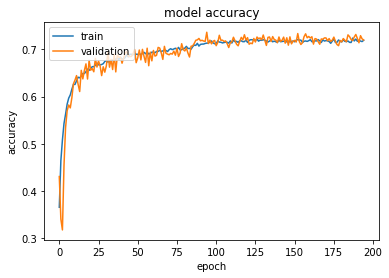

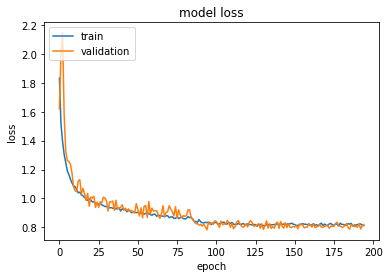

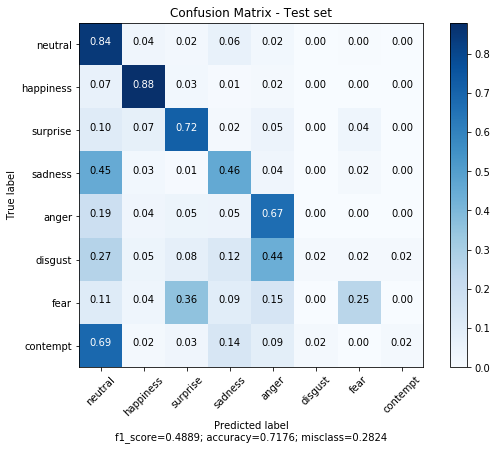

In [16]:
score = model.evaluate(X_test, reader.generate_emotions(reader.test_set), verbose=0)
print("Test accuracy: ", score)

plot_history(history)
y_pred = model.predict(X_test)
plot_confusion_matrix(y_test, y_pred, reader.emotion_columns, normalize=True, title="Confusion Matrix - Test set")

#### Prediction

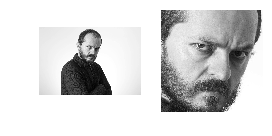

Found 1 faces in image
['anger']


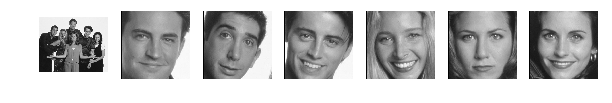

Found 6 faces in image
['happiness', 'neutral', 'happiness', 'happiness', 'neutral', 'happiness']


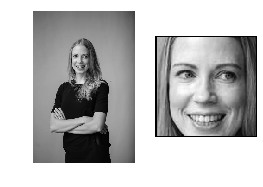

Found 1 faces in image
['happiness']


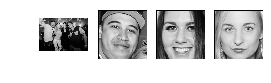

Found 3 faces in image
['happiness', 'happiness', 'neutral']


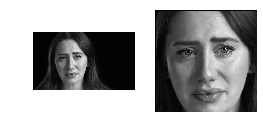

Found 1 faces in image
['sadness']


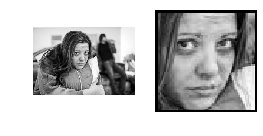

Found 1 faces in image
['sadness']


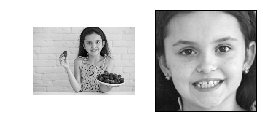

Found 1 faces in image
['happiness']


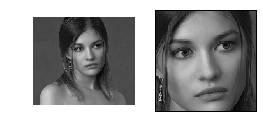

Found 1 faces in image
['neutral']


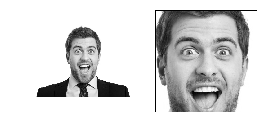

Found 1 faces in image
['surprise']


In [18]:
from src.predict import process_image
from matplotlib import pyplot as plt
import cv2 as cv
import os

face_cascade = cv.CascadeClassifier("haarcascade_frontalface_default.xml")

def predict_and_print(image_path):
    print_image(image_path)
    print(predict(image_path))
    
def predict(image_path):
    faces = process_image(image_path)
    predictions = model.predict(faces)
    prediction_labels = [reader.emotion_columns[np.argmax(predictions[i])] for i in range(len(predictions))]
    return prediction_labels    

def print_image(image_path):
    image = cv.imread(image_path)
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 6)
    if len(faces) > 3:
        fig=plt.figure(figsize=(10, 10))
    else:
        fig=plt.figure(figsize=(4, 4))
    
    sub = fig.add_subplot(1, len(faces) + 1, 1)
    sub.axis('off')
    sub.imshow(gray, cmap = 'gist_gray')

    croppeds = []
    for i, (x, y, w, h) in enumerate(faces):
        cv.rectangle(gray, (x, y), (x+w, y+h), (0, 255, 0), 2)
        croppeds.append(gray[y : y+h, x : x+w])
        
        sub = fig.add_subplot(1, len(faces) + 1, i + 2)
        sub.axis('off')
        sub.imshow(croppeds[i], cmap = 'gist_gray')

    plt.show()

for img in os.listdir("sample_images/"):
    predict_and_print("sample_images/" + img)
    
    